### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Selection Methods 

### Loading the dataset

In [2]:
dataset_path = 'titanic.csv'

df = pd.read_csv(dataset_path)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### How many passengers have embarked in Southampton?

In [3]:
# 1 - We can check the value counts of the 'Embarked' column to see the most common value
value_counts = df['Embarked'].value_counts()
print(value_counts)
print(" ")

# 2 - We can just show the values from the 'Embarked' == 'S' column
emabrked_in_southampton = df['Embarked'].value_counts()['S']
print(f"{emabrked_in_southampton} people embarked in Southampton")

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
 
644 people embarked in Southampton


### What was the price of the most expensive ticket? Find out the name(s) of the passenger(s) who bought them.


In [4]:
# price of most expensive ticket
most_expensive_ticket_price = df['Fare'].max()
print(f"The most expensive ticket price is {most_expensive_ticket_price} GBP")

# ids of people who bought the most expensive ticket
passenger_ids = df[df['Fare'] == most_expensive_ticket_price][['PassengerId', 'Name', 'Fare', ]]
passenger_ids.head()

The most expensive ticket price is 512.3292 GBP


,PassengerId,Name,Fare
258,259,"Ward, Miss. Anna",512.3292
679,680,"Cardeza, Mr. Thomas Drake Martinez",512.3292
737,738,"Lesurer, Mr. Gustave J",512.3292


In [5]:
print("Passengers who bought the most expensive ticket:")
for name in passenger_ids['Name']:
    print(f"Passenger {name} : {most_expensive_ticket_price} GBP")

Passengers who bought the most expensive ticket:
Passenger Ward, Miss. Anna : 512.3292 GBP
Passenger Cardeza, Mr. Thomas Drake Martinez : 512.3292 GBP
Passenger Lesurer, Mr. Gustave J : 512.3292 GBP


### Who were the youngest passengers? Find out their name(s) and age(s).

In [6]:
# the minimal age
minimal_age = df['Age'].min()
print(f"The minimal age is {minimal_age}")

# the passengers who has the minimal age
minimal_age_passengers = df[df['Age'] == minimal_age][['PassengerId', 'Name', 'Age']]
minimal_age_passengers.head()

The minimal age is 0.42


,PassengerId,Name,Age
803,804,"Thomas, Master. Assad Alexander",0.42


In [7]:
# name of th eyoungest passenger
minimal_age_name = minimal_age_passengers['Name'].values[0]

print(f"Passengers who has the minimal age is {minimal_age_name}")

Passengers who has the minimal age is Thomas, Master. Assad Alexander


### Who was/were the oldest passenger(s) who died during the trip? Find out their name(s) and age(s).

In [8]:
# oldest passangers who died
oldst_passengers_who_died_age = df[df['Survived'] == 0]["Age"].max()
print(f"The oldest passangers who died is {oldst_passengers_who_died_age} yrs old")

The oldest passangers who died is 74.0 yrs old


In [9]:
oldest_passengers = df[(df['Age'] == oldst_passengers_who_died_age) & (df['Survived'] == 0)][['PassengerId', 'Name', 'Age']]
oldest_passengers.head()

,PassengerId,Name,Age
851,852,"Svensson, Mr. Johan",74.0


In [10]:
oldst_passengers_who_died_name = oldest_passengers['Name'].values[0]
print(f"The oldest passangers who died is {oldst_passengers_who_died_name}")

The oldest passangers who died is Svensson, Mr. Johan


# Visualizing Categorical Data

### Create a plot that gives us an idea how likely it was for passengers of different classes (1st, 2nd, 3rd) to survive.

In [55]:
def create_stacked_bar_plot():
    # colors for the plot
    alive_color = '#17becf' # teal
    dead_color = '#7f7f7f'  # grey

    # passenger class
    group_class = set(df['Pclass'].values)

    fig, ax = plt.subplots()
    bottom = np.zeros(len(group_class))

    for class_ in group_class :
        survived = df[(df['Pclass'] == class_) & (df['Survived'] == 1)].shape[0]
        total = df[df['Pclass'] == class_].shape[0]
        ax.bar(class_, survived, bottom=bottom, label='Alive', color = alive_color)
        ax.bar(class_, total-survived, bottom=survived, label="Dead", color = dead_color)

        # adding text
        percentage = round(survived/total*100, 2)
        ax.text(class_, survived/2, f'{percentage} %', ha='center', va='center', fontsize=10, color='white')

    # naming the x-axis
    ax.set_xticks(list(group_class))
    ax.set_xticklabels([f'{cls}st' if cls == 1 else f'{cls}nd' if cls == 2 else f'{cls}rd' for cls in group_class])

    ax.set_yticks(np.arange(0, 600, 50))


    # labels and title
    ax.set_title('Survival Rate by Passenger Class')
    ax.set_xlabel('Passenger Class')
    ax.set_ylabel('Number of Passengers in Class')

    # adjust legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize='medium')
    plt.show()

#### Stacked bar plot

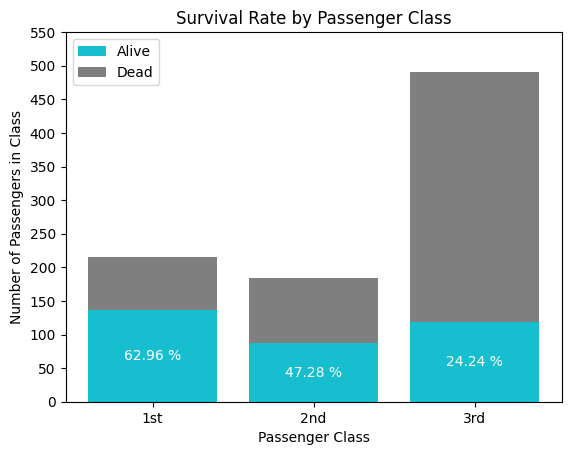

In [54]:
create_stacked_bar_plot()

### Visualizing passengers’ journeys using their embarking locations and their survival status (think voter-flow analysis)

In [12]:
# TODO

### Make up one additional question yourself and come up with a fitting plot to answer it!

In [ ]:
# TODO